# <font color='blue'>Laboratório de Inovação ICTB - Instituto de Ciência e Tecnologia em Biomodelos</font>

## <font color='blue'>Projeto - Medição do Risco de Descarte Animal</font>

## Definição do Problema

Medição do risco de descarte animal de acordo com 2 linhagens e 3 níveis de classificação: baixo, médio e alto.

## Fonte de Dados

FIOCRUZ / ICTB

## Pacotes instalados

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.12


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark


[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: /usr/bin/python3 -m pip install --upgrade pip


In [3]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: /usr/bin/python3 -m pip install --upgrade pip


In [5]:
!pip install xgboost --no-cache-dir

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: /usr/bin/python3 -m pip install --upgrade pip


In [7]:
# Imports
import pickle
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "ICTB" --iversions

Author: ICTB

IPython   : 8.6.0
matplotlib: 3.6.2
numpy     : 1.24.2
pandas    : 2.3.3
platform  : 1.0.8
sklearn   : 1.4.1.post1
xgboost   : 2.0.3



## Carregamento dos Dados

In [9]:
# Download dos dados
df_black = pd.read_csv("dados/black6.csv", 
                     sep = ";")

In [10]:
# Visualiza os dados
df_black.head()

,temperatura,amonia,idade,peso,sexo,fotoperiodo,ruido,luz,umidade,infeccoes,animais_por_gaiola,risco
0,38,11,28,332,0,10,67,161,79,1,2,5
1,34,15,666,26,1,16,22,263,4,0,1,5
2,24,15,386,376,0,16,41,151,94,1,2,5
3,38,9,544,401,0,16,50,64,92,0,2,6
4,29,17,563,163,0,12,16,261,20,1,3,5


In [11]:
# Download dos dados
df_swiss = pd.read_csv("dados/swiss.csv",
                       sep = ";")

In [12]:
# Visualiza os dados
df_swiss.head()

,temperatura,amonia,idade,peso,sexo,fotoperiodo,ruido,luz,umidade,infeccoes,animais_por_gaiola,risco
0,28,20,540,269,0,15,49,145,16,1,4,5
1,34,12,202,202,0,10,49,152,81,0,4,5
2,27,23,233,187,1,10,26,260,17,0,3,5
3,27,9,91,346,1,11,45,274,48,1,3,6
4,24,14,634,373,0,13,32,292,41,1,4,5


Merge (concatenação) dos datasets.

In [13]:
# Criar novo atributo para representar a linhagem
df_black['linhagem'] = 0
df_swiss['linhagem'] = 1

In [14]:
# Concatenação
df_linhagens = pd.concat([df_black, df_swiss], ignore_index = True)

In [15]:
# Visualiza dados
df_linhagens.head()

,temperatura,amonia,idade,peso,sexo,fotoperiodo,ruido,luz,umidade,infeccoes,animais_por_gaiola,risco,linhagem
0,38,11,28,332,0,10,67,161,79,1,2,5,0
1,34,15,666,26,1,16,22,263,4,0,1,5,0
2,24,15,386,376,0,16,41,151,94,1,2,5,0
3,38,9,544,401,0,16,50,64,92,0,2,6,0
4,29,17,563,163,0,12,16,261,20,1,3,5,0


In [16]:
# Shape
df_linhagens.shape

(99998, 13)

## Análise Exploratória

In [17]:
# Tipos dos dados
df_linhagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99998 entries, 0 to 99997
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   temperatura         99998 non-null  int64
 1   amonia              99998 non-null  int64
 2   idade               99998 non-null  int64
 3   peso                99998 non-null  int64
 4   sexo                99998 non-null  int64
 5   fotoperiodo         99998 non-null  int64
 6   ruido               99998 non-null  int64
 7   luz                 99998 non-null  int64
 8   umidade             99998 non-null  int64
 9   infeccoes           99998 non-null  int64
 10  animais_por_gaiola  99998 non-null  int64
 11  risco               99998 non-null  int64
 12  linhagem            99998 non-null  int64
dtypes: int64(13)
memory usage: 9.9 MB


In [18]:
#  Resumo estatístico
df_linhagens.describe()

,temperatura,amonia,idade,peso,sexo,fotoperiodo,ruido,luz,umidade,infeccoes,animais_por_gaiola,risco,linhagem
count,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.00000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000
mean,30.009840,19.534151,375.401268,254.867337,0.499830,12.99245,45.050371,180.145543,49.866837,0.499570,2.993500,5.991000,0.500000
std,6.061228,6.340933,204.990756,141.801658,0.500002,1.99448,20.476775,69.719779,29.166421,0.500002,1.409701,1.973954,0.500003
min,20.000000,9.000000,21.000000,10.000000,0.000000,10.00000,10.000000,60.000000,0.000000,0.000000,1.000000,3.000000,0.000000
25%,25.000000,14.000000,198.000000,132.000000,0.000000,11.00000,27.000000,120.000000,25.000000,0.000000,2.000000,4.000000,0.000000
50%,30.000000,20.000000,375.000000,255.000000,0.000000,13.00000,45.000000,180.000000,50.000000,0.000000,3.000000,6.000000,0.500000
75%,35.000000,25.000000,553.000000,378.000000,1.000000,15.00000,63.000000,241.000000,75.000000,1.000000,4.000000,8.000000,1.000000
max,40.000000,30.000000,730.000000,500.000000,1.000000,16.00000,80.000000,300.000000,100.000000,1.000000,5.000000,9.000000,1.000000


In [19]:
# Distribuição de classe
df_linhagens['risco'].value_counts()

risco
5    15264
6    15175
7    14278
9    13902
3    13894
8    13758
4    13727
Name: count, dtype: int64

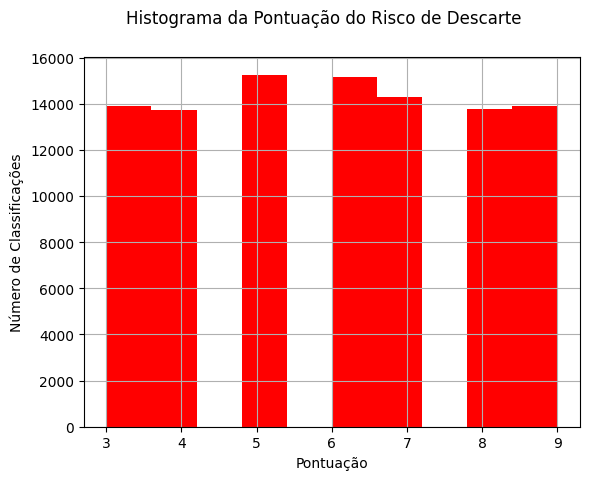

In [20]:
df_linhagens['risco'].hist(color = "red")
plt.suptitle('Histograma da Pontuação do Risco de Descarte')
plt.xlabel('Pontuação')
plt.ylabel('Número de Classificações')
plt.show()

## Estratégias de Balanceamento de Classe

In [21]:
# Extrai as classes atuais
pontuacoes = set(df_linhagens['risco'])
pontuacoes

{3, 4, 5, 6, 7, 8, 9}

In [22]:
# Vamos extrair 500 amostras de cada classe (undersampling)
df_temp = []
for pont in pontuacoes:
    
    # Extrai os registros para uma pontuação
    df_temp_linhagens = df_linhagens[df_linhagens['risco']==pont]

    # Se o comprimento for maior que 500 coletamos uma amostra de apenas 500
    if (len(df_temp_linhagens) > 5000):
        df_temp_linhagens = df_temp_linhagens.sample(5000, replace = False)
        
    df_temp.append(df_temp_linhagens)    

In [23]:
len(df_temp) 

7

In [24]:
# Converte para dataframe
df_linhagens_bal = pd.concat(df_temp)

In [25]:
# Total de registros por classe
print(df_linhagens_bal['risco'].value_counts())

risco
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
Name: count, dtype: int64


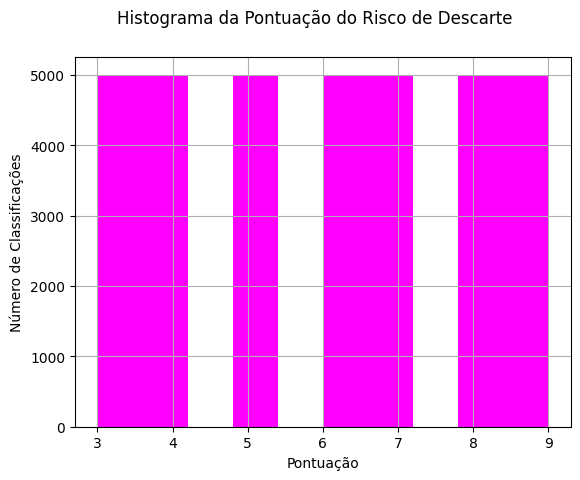

In [26]:
# Plot
df_linhagens_bal['risco'].hist(color = "magenta")
plt.suptitle('Histograma da Pontuação do Risco de Descarte' )
plt.xlabel('Pontuação')
plt.ylabel('Número de Classificações')
plt.show()

As classes ainda estão debalanceadas.

<TABLE>
<TR><TD>Pontuação Atual</TD><TD>Nova Pontuação</TD></TR>
<TR><TD>3,4,5</TD><TD>3</TD></TR>
<TR><TD>6</TD><TD>6</TD></TR>
<TR><TD>7,8,9</TD><TD>9</TD></TR>
</TABLE>

In [27]:
# Criando as novas categorias

# Classificação mais baixa
df_linhagens_nivel_1 = df_linhagens[df_linhagens['risco'].isin([3,4,5])]
df_linhagens_nivel_1['risco'] = 3

# Classificação média
df_linhagens_nivel_2 = df_linhagens[df_linhagens['risco']==6]
df_linhagens_nivel_2['risco'] = 6

# Classificação mais alta
df_linhagens_nivel_3 = df_linhagens[df_linhagens['risco'].isin([7,8,9])]
df_linhagens_nivel_3['risco'] = 9

# Final
df_linhagens_final = pd.concat([df_linhagens_nivel_1, df_linhagens_nivel_2, df_linhagens_nivel_3], ignore_index = True)

In [28]:
# Total de registros por classe
print(df_linhagens_final['risco'].value_counts())

risco
3    42885
9    41938
6    15175
Name: count, dtype: int64


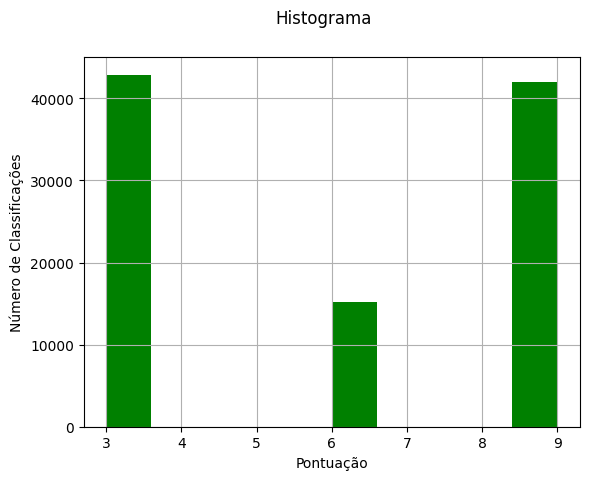

In [29]:
# Plot
df_linhagens_final['risco'].hist(color = "green")
plt.suptitle('Histograma')
plt.xlabel('Pontuação')
plt.ylabel('Número de Classificações')
plt.show()

In [30]:
# Salvamos uma cópia do noovo dataset em disco
df_linhagens_final.to_csv('dados/df_linhagens_final.csv', index = False)

## Pré-Processamento

In [31]:
# Separa os atributos da variável target
atributos = [ft for ft in list(df_linhagens_final) if ft not in ['risco']]
atributos

['temperatura',
 'amonia',
 'idade',
 'peso',
 'sexo',
 'fotoperiodo',
 'ruido',
 'luz',
 'umidade',
 'infeccoes',
 'animais_por_gaiola',
 'linhagem']

In [32]:
# Converte a variável target em tipo categórico
df_linhagens_final['risco'] = pd.Categorical(df_linhagens_final['risco'])

In [33]:
# Cria uma nova variável target com os valores 0, 1 e 2 representam as 3 classificações possíveis
df_linhagens_final['risco_class'] = df_linhagens_final['risco'].cat.codes

In [34]:
# Nova variável target
target = 'risco_class'

In [37]:
# Grupos da variável target
grupos_saida = len(set(df_linhagens_final[target]))
grupos_saida

3

In [40]:
print(set(df_linhagens_final[target]))

{0, 1, 2}


In [41]:
# Divisão em Dados de Treino e Teste
X_treino, X_teste, y_treino, y_teste = train_test_split(df_linhagens_final[atributos],
                                                        df_linhagens_final[target], 
                                                        test_size = 0.3, 
                                                        random_state = 1)

In [42]:
print(("Total de X_treino: %i, Total de X_teste: %i, Total de y_treino: %i, Total de y_teste: %i") % (len(X_treino),
                                                                                                      len(X_teste),
                                                                                                      len(y_treino),
                                                                                                      len(y_teste)))

Total de X_treino: 69998, Total de X_teste: 30000, Total de y_treino: 69998, Total de y_teste: 30000


## Construção, Treinamento e Avaliação do Modelo

In [68]:
from xgboost import XGBClassifier

modelo_linhagens = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)


In [38]:
# Criação o modelo
# modelo_linhagens = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 100, random_state = 100)

Treinamento do modelo.

In [69]:
%%time
modelo_linhagens.fit(X_treino[atributos], y_treino)

CPU times: user 11.2 s, sys: 70.7 ms, total: 11.3 s
Wall time: 1.53 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [71]:
# Salva o modelo
#with open('modelo/modelo_linhagens.p', 'wb') as f:
#    pickle.dump(modelo_linhagens, f, 2)

modelo_linhagens.save_model("modelo/modelo_linhagens.json")

In [72]:
# Carrega o modelo para avaliação
# modelo_linhagens_final = pickle.load(open("modelo/modelo_linhagens.p", "rb" ))
from xgboost import XGBClassifier

model = XGBClassifier()
model.load_model("modelo/modelo_linhagens.json")


## Avaliação do Modelo

In [73]:
# Previsões com o modelo treinado
previsoes = modelo_linhagens_final.predict_proba(X_teste)

In [74]:
previsoes.shape

(30000, 3)

In [75]:
# Visualiza todas as previsões
previsoes

array([[0.44285417, 0.13811277, 0.41903305],
       [0.414264  , 0.15036243, 0.4353736 ],
       [0.43165824, 0.14200775, 0.42633396],
       ...,
       [0.45569146, 0.14348   , 0.40082854],
       [0.41851974, 0.15337288, 0.42810732],
       [0.4179202 , 0.17230865, 0.40977114]], dtype=float32)

In [76]:
# Visualiza uma previsão do risco no índice zero
previsoes[0]

array([0.44285417, 0.13811277, 0.41903305], dtype=float32)

In [77]:
list(df_linhagens_final['risco'].cat.categories)

[3, 6, 9]

In [78]:
# Maior previsão feita para o risco no índice zero
print('Argmax: %i' % np.argmax(previsoes[0]))

Argmax: 0


In [79]:
# Classificação do risco no índice zero
print('Classificação do Risco: %i' % list(df_linhagens_final['risco'].cat.categories)[np.argmax(previsoes[0])])

Classificação do Risco: 3


In [80]:
# Agora extraímos a maior probabilidade de cada previsão para calcular a precisão
best_preds = np.asarray([np.argmax(line) for line in previsoes])
print ("Precisão: %0.2f" % precision_score(y_teste, best_preds, average = 'macro'))

Precisão: 0.28


In [81]:
from sklearn.metrics import accuracy_score
print ("Acurácia: %0.2f" % accuracy_score(y_teste, best_preds))

Acurácia: 0.42


In [57]:
set(df_linhagens_final['risco'])

{3, 6, 9}

In [58]:
# Função para o plot da Matriz de Confusão
def plot_confusion_matrix(cm, 
                          classes,
                          normalize = False,
                          title = 'Matriz de Confusão',
                          cmap = plt.cm.RdYlGn):
   
    import itertools
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão Não Normalizada')

    print(cm)

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                 horizontalalignment = "center", 
                 color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Label Real')
    plt.xlabel('Label Previsto')

In [59]:
# Calcula a Matriz de Confusão
cnf_matrix = confusion_matrix(y_teste, best_preds)

Matriz de Confusão Não Normalizada
[[7887    0 5104]
 [2696    0 1843]
 [7607    0 4863]]


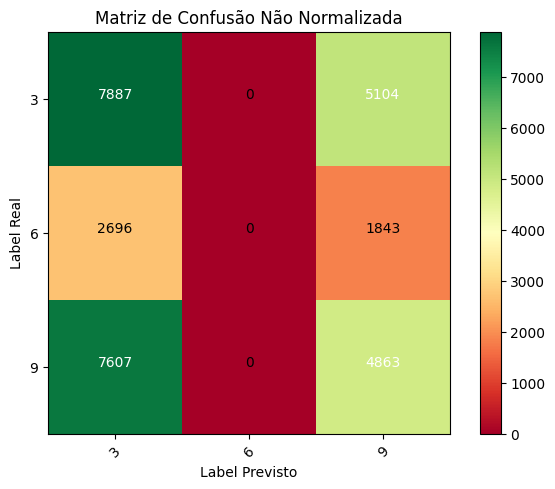

In [60]:
# Plot
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes = list(df_linhagens_final['risco'].cat.categories),
                      title = 'Matriz de Confusão Não Normalizada')
plt.show()

## Previsões com o Modelo Treinado

In [61]:
# Considerar valores abaixo para uma nova linhagem
temperatura = 34
amonia = 12
idade = 100
peso = 235
sexo = 0
fotoperiodo = 12
ruido = 52
luz = 105
umidade = 45
infeccoes = 0
animais_por_gaiola = 5
linhagem = 0

In [62]:
# Cria o dataframe com novos dados
novos_dados = pd.DataFrame([[temperatura,
                             amonia,
                             idade,
                             peso,
                             sexo,
                             fotoperiodo,
                             ruido,
                             luz,
                             umidade,
                             infeccoes,
                             animais_por_gaiola,
                             linhagem]], 
                           columns = X_teste.columns.values)

In [63]:
# Visualiza
novos_dados

,temperatura,amonia,idade,peso,sexo,fotoperiodo,ruido,luz,umidade,infeccoes,animais_por_gaiola,linhagem
0,34,12,100,235,0,12,52,105,45,0,5,0


In [64]:
# Previsões com o modelo treinado
previsoes_novos_dados = modelo_linhagens_final.predict_proba((novos_dados))

In [65]:
# Visualiza
previsoes_novos_dados 

array([[0.42841437, 0.15073943, 0.42084613]], dtype=float32)

In [66]:
# Previsão do Risco de Descarte
print(('Previsão do Risco de Descarte: %i') % list(df_linhagens_final['risco'].cat.categories)[np.argmax(previsoes_novos_dados)])

Previsão do Risco de Descarte: 3


In [67]:
# Vamos calcular a classificação média para comparar
print(('Classificação Média do Risco: %0.2f') % np.mean(df_linhagens_final['risco'].values))

Classificação Média do Risco: 5.97


Deploy do modelo.

# Fim